# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
! git clone https://github.com/SafaaMahbub/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 27 (delta 6), reused 4 (delta 4), pack-reused 17 (from 1)
Receiving objects: 100% (27/27), 47.00 KiB | 7.83 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Download complete
Extracting data files...
Data extracted


In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/airbnb_NYC.csv',encoding='latin1')

df.tail(200)
df['Price'] = df['Price'].str.replace(',','')

df['Price'] = pd.to_numeric( df['Price'], errors = 'coerce' )

df.tail(200)

count = df['Price'].isna().sum()
print(count)



0


In [39]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/mn_police_use_of_force.csv',encoding='latin1')
df.head()

print(df['subject_injury'].value_counts(dropna=False))
df['subject_injury'] = df['subject_injury'].fillna('Missing')
print(df['subject_injury'].value_counts(dropna=False))



pd.crosstab(df['subject_injury'], df['force_type'])

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


the missing rows are much higher

In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/metabric.csv',encoding='latin1')
df['Overall Survival Status'] = df['Overall Survival Status'].map({'0:LIVING':1,'1:DECEASED':0})
df['Overall Survival Status'].value_counts()

,count
Overall Survival Status,
0,768
1,575


Missing values: For airbnb_NYC.csv, determine how many missing values of Review Scores Rating there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [47]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/airbnb_NYC.csv',encoding='latin1')
print(df['Review Scores Rating'].value_counts(dropna=False))

df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())
print(df['Review Scores Rating'].value_counts(dropna=False))

Review Scores Rating
NaN      8323
100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
94.0      943
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0      365
86.0      348
99.0      318
84.0      289
83.0      267
60.0      244
82.0      136
70.0      132
73.0       89
78.0       84
77.0       80
76.0       75
81.0       66
75.0       60
40.0       47
79.0       46
67.0       42
20.0       39
72.0       32
74.0       26
71.0       22
65.0       21
68.0       19
50.0       19
69.0       11
53.0        8
62.0        5
63.0        5
64.0        4
66.0        3
47.0        3
55.0        3
57.0        2
58.0        2
43.0        2
30.0        2
49.0        1
Name: count, dtype: int64
Review Scores Rating
94.0     9266
100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0    

if the most ratings were nto good the median would be low to. If we fill the missing scores with the median score that is low, it might pull down the overall average rating

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [58]:
import pandas as pd

df = pd.read_excel('/content/GSAF5.xls')

print(df.columns)

empty_col = df.columns[df.isna().isnull().all()].tolist()
print(empty_col)
df = df.drop(empty_col, axis=1)

print(df.columns)
df.head()


df['Year'] = pd.to_numeric( df['Year'], errors = 'coerce' )
df.dtypes

filtered_df = df.loc[df['Year']>1940]
filtered_df['Year'].value_counts()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[]
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


,count
Year,
2015.0,143
2017.0,141
2016.0,134
2011.0,128
2014.0,126
...,...
1978.0,26
1977.0,26
1979.0,25


the attacks are increased and there has been an incrase in the recent years.

In [64]:
filtered_df['Age'].value_counts()
filtered_df['Age'].replace('?', 'Missing', inplace=True)

/tmp/ipython-input-3993518424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Age'].replace('?', 'Missing', inplace=True)


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

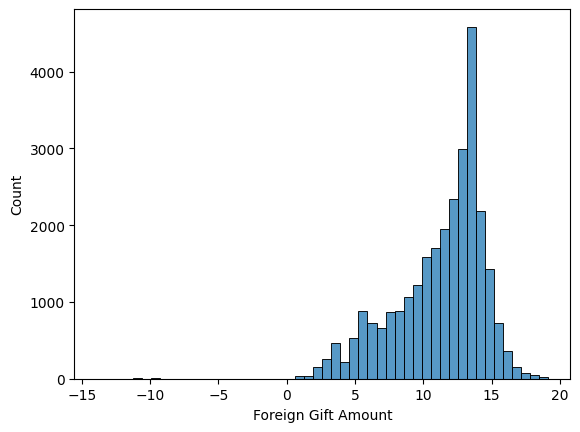

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/data/ForeignGifts_edu.csv',encoding='latin1')

sns.histplot( np.arcsinh(df['Foreign Gift Amount']), bins=50 )


In [71]:
df['Foreign Gift Amount'].describe()

,Foreign Gift Amount
count,2.822100e+04
mean,5.882327e+05
std,3.222011e+06
min,-5.377700e+05
25%,5.700000e+03
50%,9.461500e+04
75%,3.761420e+05
max,1.000000e+08


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?